   В данном разделе рассмотрим методы Классификации данных. Классификация - это разделение объектов на классы по некоторым признакам. Разбивать наш датасет будем по признакам год выпуска и цена авто.

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def my_plot(x, y, c):
    plt.xlabel('year')
    plt.ylabel('price')
    plt.scatter(x, y_test, c=c, cmap='rainbow', alpha=0.7)
    
data = pd.read_csv('./src/USA_cars_datasets.csv')

data_x = data.year.values
data_y = data.price.values

x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)

data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


И для начала рассмотрим простейший метод классификации - метод k-ближайших соседей. Этот метод при выборе класса для объекта опирается на то, каким классам принадлежат ближайшие соседи объекта.

Этот метод реализован классом KNeighborsClassifier пакета sklearn.

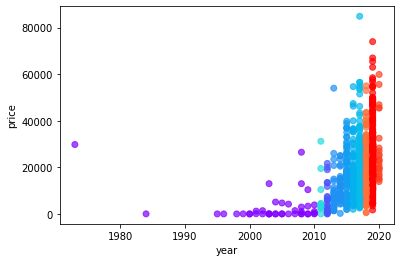

In [30]:
neigh = KNeighborsClassifier()
neigh.fit(x_train.reshape(-1, 1), y_train)

my_plot(x_test.reshape(-1, 1), y_test, neigh.predict(x_test.reshape(-1, 1)))

Класс SVC реализует метод опорных векторов.

Метод опорных векторов – перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве.

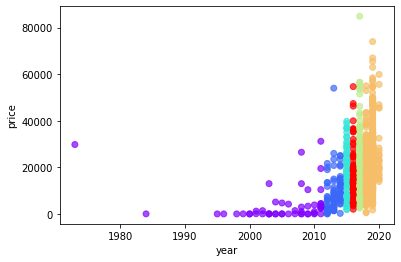

In [34]:
clf = SVC(kernel='rbf', degree=3, gamma='scale')
clf.fit(x_train.reshape(-1, 1), y_train)

my_plot(x_test.reshape(-1, 1), y_test, clf.predict(x_test.reshape(-1, 1)))

Наивные байесовские алгоритмы — это метод классификации, основанный на применении теоремы Байеса с сильным предположением, что все предикторы независимы друг от друга. Проще говоря, предполагается, что наличие функции в классе не зависит от присутствия любой другой функции в том же классе. Хотя все эти функции зависят друг от друга, они независимо влияют на вероятность того, что телефон является смартфоном.

Использовать мы будем простейшую реализацию этого, а именно GaussianNB, который реализует Гауссовский наивный байесофский классификатор. Он предполагает, что данные каждого класса взяты из простого распределения Гаусса.

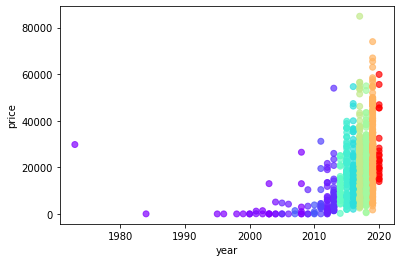

In [39]:
gnb= GaussianNB()
gnb.fit(x_train.reshape(-1, 1), y_train)

my_plot(x_test.reshape(-1, 1), y_test, gnb.predict(x_test.reshape(-1, 1)))

Дерево принятия решений — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На «ветках» дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной на основе нескольких переменных на входе.

Для реализации этого метода в sklearn есть класс DecisionTreeClassifier.

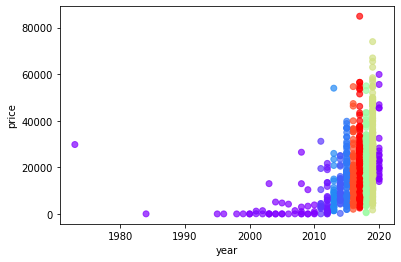

In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.reshape(-1, 1), y_train)

my_plot(x_test.reshape(-1, 1), y_test, dtc.predict(x_test.reshape(-1, 1)))

В этом разделе рассмотрены методы классификации данных. Все они имеют право на жизнь, решать, какой использовать нужно на основе ваших данных.

Далее продемонстрирую домашнее задание из лекции.

(array([0.        , 0.        , 0.        , 0.66666667, 0.66666667,
       1.        ]), array([0.        , 0.33333333, 0.66666667, 0.66666667, 1.        ,
       1.        ]), array([1.9 , 0.9 , 0.73, 0.39, 0.23, 0.14])) 0.7777777777777778


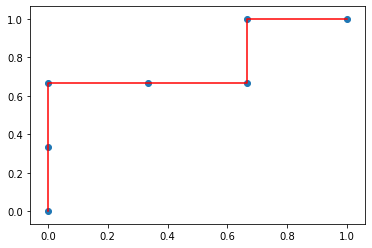

In [51]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

samples = np.array([0,1,0,0,1,1])
scores = np.array([0.14, 0.23, 0.39, 0.54, 0.73, 0.9])

FPR, TPR, _ = roc_curve(samples, scores, drop_intermediate = False)

print(roc_curve(samples, scores), auc(FPR, TPR))

plt.scatter(FPR, TPR)
plt.plot(FPR, TPR, c = 'r')